<a href="https://colab.research.google.com/github/Rongshaofeng/DeepLeaning-Project/blob/master/Keras_MultiClassify_REUTERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#使用路透社新闻数据实现新闻标题多分类任务
#导入tensorflow和高阶api keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#导入数据集路透社新闻数据
from keras.datasets import reuters
#加载训练集并只加载高频的10000词
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [3]:
#打印训练集和测试集数量
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
#查看下标为10的训练集数据样式
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
#获取训练集的单词索引字典，并转换为数字索引单词的字典
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
#将训练集第一个数据解码看看原文是什么
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [6]:
#标签是0-45内的整数，话题索引号
print(train_labels[10])

3


In [0]:
#导入numpy并定义序列向量化函数，将sequences中第i个单词的索引数字处数组设置为1，完成向量化
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [0]:
#将标签one-hot编码，即数组下标为类别号的值为1，其他为0
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1
  return results

In [0]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [10]:
print(one_hot_test_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#或者使用keras内置onehot
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [12]:
print(one_hot_test_labels[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#使用keras建立全连接模型实现多分类
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(46,activation='softmax')
])

In [0]:
#编译模型指定优化器，损失函数，评估指标
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),loss=keras.losses.categorical_crossentropy,metrics=[keras.metrics.categorical_accuracy])

In [0]:
#使用前1000个数据做验证集，后1000个做训练集
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [16]:
#开始训练模型，将训练集放入，指定训练轮数，批大小，验证集，并将训练的过程保存到history对象中
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 162us/sample - loss: 2.6253 - categorical_accuracy: 0.5033 - val_loss: 1.7335 - val_categorical_accuracy: 0.6530
Epoch 2/20
7982/7982 [==============================] - 1s 121us/sample - loss: 1.4246 - categorical_accuracy: 0.7180 - val_loss: 1.2998 - val_categorical_accuracy: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 123us/sample - loss: 1.0646 - categorical_accuracy: 0.7761 - val_loss: 1.1341 - val_categorical_accuracy: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 125us/sample - loss: 0.8431 - categorical_accuracy: 0.8192 - val_loss: 1.0958 - val_categorical_accuracy: 0.7530
Epoch 5/20
7982/7982 [==============================] - 1s 125us/sample - loss: 0.6784 - categorical_accuracy: 0.8603 - val_loss: 0.9527 - val_categorical_accuracy: 0.8030
Epoch 6/20


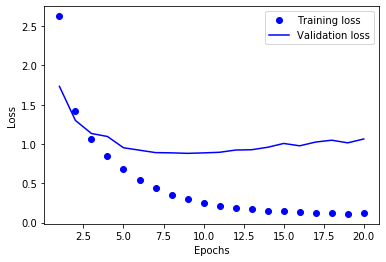

In [17]:
#绘制图像，观察训练过程训练集和验证集指标变化
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


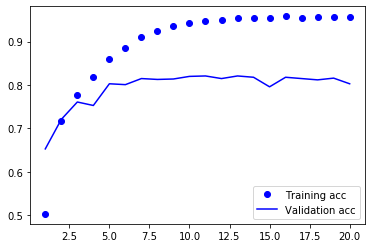

In [18]:
plt.clf()

print(history.history.keys())
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')

plt.legend()

plt.show()

In [0]:
#由图可知，模型出现了过拟合，训练集loss降低同时验证集loss开始上升，训练集acc上升同时验证集acc不变或开始下降